In [ ]:
#! pip install tensorflow




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv("train.csv")

In [3]:
# 대괄호 [ ] 제거
train['URL_clean'] = train['URL'].str.replace(r'[\[\]]', '', regex=True)
train["URL_clean"]

0                                         poznan.wuoz.gov.pl
1                                        vill.okawa.kochi.jp
2                                      nationalfinance.co.om
3                                     town.ozora.hokkaido.jp
4                          open24.ie-news.irish/online/Login
                                 ...                        
6995051                                           ddht.co.kr
6995052                                 www.upstartepoxy.com
6995053    employeesalaryschedule70.000webhostapp.com/adb...
6995054                                       dekalbtool.com
6995055                                   helpinganimals.com
Name: URL_clean, Length: 6995056, dtype: object

In [4]:
train

,ID,URL,label,URL_clean
0,TRAIN_0000000,poznan[.]wuoz[.]gov[.]pl,0,poznan.wuoz.gov.pl
1,TRAIN_0000001,vill[.]okawa[.]kochi[.]jp,0,vill.okawa.kochi.jp
2,TRAIN_0000002,nationalfinance[.]co[.]om,0,nationalfinance.co.om
3,TRAIN_0000003,town[.]ozora[.]hokkaido[.]jp,0,town.ozora.hokkaido.jp
4,TRAIN_0000004,open24[.]ie-news[.]irish/online/Login,1,open24.ie-news.irish/online/Login
...,...,...,...,...
6995051,TRAIN_6995051,ddht[.]co[.]kr,0,ddht.co.kr
6995052,TRAIN_6995052,www[.]upstartepoxy[.]com,0,www.upstartepoxy.com
6995053,TRAIN_6995053,employeesalaryschedule70[.]000webhostapp[.]com...,1,employeesalaryschedule70.000webhostapp.com/adb...
6995054,TRAIN_6995054,dekalbtool[.]com,0,dekalbtool.com


In [5]:
train['dot_count'] = train['URL_clean'].str.count('\.')
train['slash_count'] = train['URL_clean'].str.count('/')
train['alpha_count'] = train['URL_clean'].str.count(r'[a-zA-Z]')
train['dash_count'] = train['URL_clean'].str.count(r'-')
train['underscore_count'] = train['URL_clean'].str.count(r'_')
train['digit_count'] = train['URL_clean'].str.count(r'\d')
train['percent_count'] = train['URL_clean'].str.count(r'%')
train['equal_count'] = train['URL_clean'].str.count(r'=')
train['question_count'] = train['URL_clean'].str.count(r'\?')
train['at_count'] = train['URL_clean'].str.count(r'@')

In [6]:
train

,ID,URL,label,URL_clean,dot_count,slash_count,alpha_count,dash_count,underscore_count,digit_count,percent_count,equal_count,question_count,at_count
0,TRAIN_0000000,poznan[.]wuoz[.]gov[.]pl,0,poznan.wuoz.gov.pl,3,0,15,0,0,0,0,0,0,0
1,TRAIN_0000001,vill[.]okawa[.]kochi[.]jp,0,vill.okawa.kochi.jp,3,0,16,0,0,0,0,0,0,0
2,TRAIN_0000002,nationalfinance[.]co[.]om,0,nationalfinance.co.om,2,0,19,0,0,0,0,0,0,0
3,TRAIN_0000003,town[.]ozora[.]hokkaido[.]jp,0,town.ozora.hokkaido.jp,3,0,19,0,0,0,0,0,0,0
4,TRAIN_0000004,open24[.]ie-news[.]irish/online/Login,1,open24.ie-news.irish/online/Login,2,2,26,1,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995051,TRAIN_6995051,ddht[.]co[.]kr,0,ddht.co.kr,2,0,8,0,0,0,0,0,0,0
6995052,TRAIN_6995052,www[.]upstartepoxy[.]com,0,www.upstartepoxy.com,2,0,18,0,0,0,0,0,0,0
6995053,TRAIN_6995053,employeesalaryschedule70[.]000webhostapp[.]com...,1,employeesalaryschedule70.000webhostapp.com/adb...,2,2,41,0,0,5,0,0,0,0
6995054,TRAIN_6995054,dekalbtool[.]com,0,dekalbtool.com,1,0,13,0,0,0,0,0,0,0


In [7]:
X = train[[
    'dot_count', 'slash_count', 'alpha_count',
    'dash_count', 'underscore_count', 'digit_count',
    'percent_count', 'equal_count', 'question_count', 'at_count'
]]


In [8]:
y = train['label']


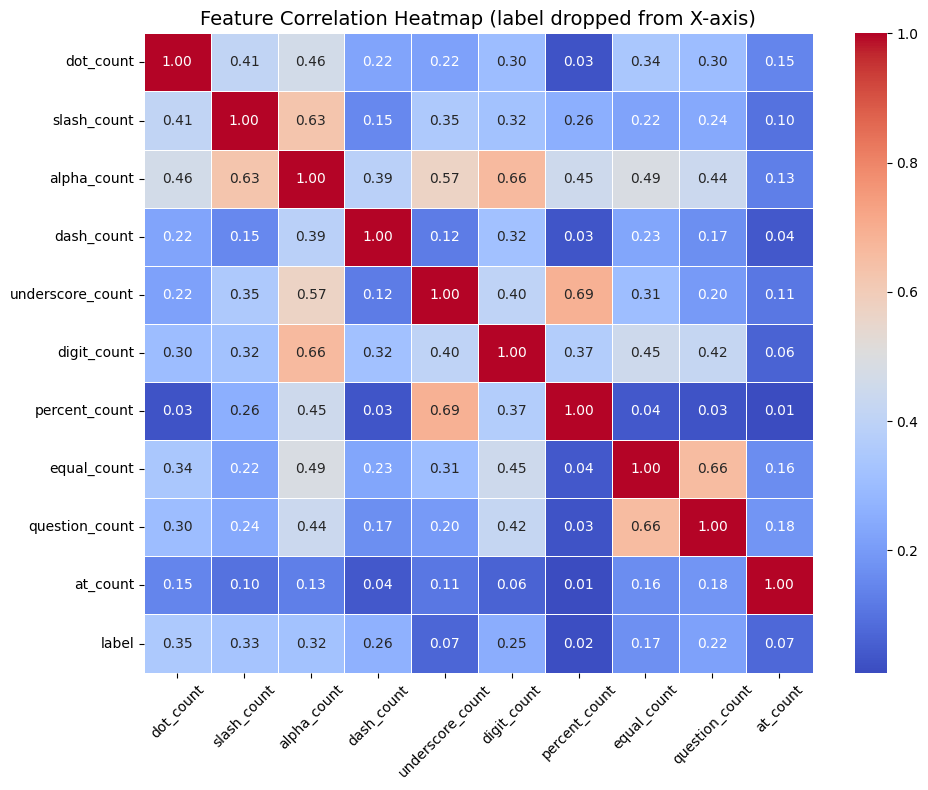

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 피처 + label 포함해서 상관행렬 계산
features = [
    'dot_count', 'slash_count', 'alpha_count', 
    'dash_count', 'underscore_count', 'digit_count',
    'percent_count', 'equal_count', 'question_count', 'at_count', 'label'
]

corr_df = train[features].corr(numeric_only=True)

# X축에서 label 제거
corr_df = corr_df.drop(columns=['label'])

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (label dropped from X-axis)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
from sklearn.model_selection import train_test_split

# 1단계: 전체에서 테스트 세트 먼저 떼어내기 (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 2단계: 남은 80% 중에서 훈련 / 검증으로 다시 나누기 (검증 20% = 전체의 16%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dense(32, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))


C:\Users\human\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# 모델 컴파일
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)  # 학습률을 너무 크게 설정하면 빨리 수렴할 수 있음

model.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
# EarlyStopping 콜백을 사용하여 검증 손실이 개선되지 않으면 학습을 멈추도록 설정
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=100)

In [19]:
# 모델 학습 (Epoch마다 정확도 출력)
history = model.fit(X_train, y_train, 
                    epochs=10,               # 최대 epoch 수
                    batch_size=32,            # 배치 크기
                    validation_data=(X_val, y_val),  # 검증 데이터
)

Epoch 1/10
139902/139902 ━━━━━━━━━━━━━━━━━━━━ 217s 2ms/step - accuracy: 0.8756 - loss: 0.3075 - val_accuracy: 0.8803 - val_loss: 0.2991
Epoch 2/10
139902/139902 ━━━━━━━━━━━━━━━━━━━━ 205s 1ms/step - accuracy: 0.8801 - loss: 0.2996 - val_accuracy: 0.8815 - val_loss: 0.2976
Epoch 3/10
139863/139902 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8812 - loss: 0.2984

KeyboardInterrupt: 

In [ ]:
# 모델 평가
from sklearn.metrics import accuracy_score
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy:.4f}')

In [ ]:
# 언더샘플링 적용
rus = RandomUnderSampler(random_state=42)

# X_train과 y_train을 언더샘플링하여 균형 맞추기
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# 언더샘플링 후 클래스 분포 확인
print("After undersampling:", Counter(y_train_under))

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

# 확률 예측값이 y_val_proba라고 가정
# 예: y_val_proba = model.predict(X_val).ravel()

# 0.1 ~ 0.89 범위에서 0.01 간격으로 threshold 후보 생성
thresholds = np.arange(0.1, 0.9, 0.01)

# 각 threshold마다 F1 점수 계산
threshold_range = [i * 0.01 for i in range(100)]
f1_scores = []
accuracies = []
thresholds = []

y_val_proba = model.predict(X_val).flatten()

for t in thresholds:
    y_pred = (y_val_proba > t).astype(int)  # 임계값 기준으로 이진 분류
    score = f1_score(y_val, y_pred)
    f1_scores.append(score)
    acc = accuracy_score(y_val, y_pred)   

for t in [i * 0.01 for i in range(100)]:
    y_pred = (y_val_proba > t).astype(int)

    try:
        f1 = f1_score(y_val, y_pred)
        acc = accuracy_score(y_val, y_pred)

        thresholds.append(t)         # 여기서 같이 append!
        f1_scores.append(f1)
        accuracies.append(acc)
    except:
        continue

34976/34976 ━━━━━━━━━━━━━━━━━━━━ 23s 662us/step


In [ ]:
# 최고 F1 점수 기준 인덱스
best_idx = f1_scores.index(max(f1_scores))
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]
best_acc = accuracies[best_idx]  

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1 Score: {best_f1:.4f}")
print(f"Accuracy at Best Threshold: {best_acc:.4f}")

Best Threshold: 0.34
Best F1 Score: 0.7248
Accuracy at Best Threshold: 0.8735


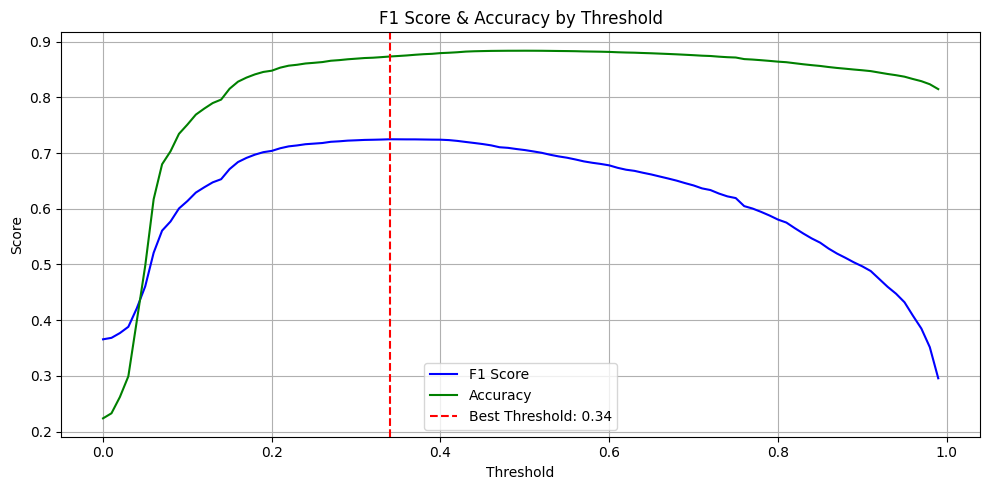

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(thresholds, f1_scores, label='F1 Score', color='blue')
plt.plot(thresholds, accuracies, label='Accuracy', color='green')
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("F1 Score & Accuracy by Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 테스트 데이터 예측 확률
y_test_proba = model.predict(X_test).ravel()

# 최적 임계값 적용해서 예측값 변환
y_test_pred = (y_test_proba > best_threshold).astype(int)



43720/43720 ━━━━━━━━━━━━━━━━━━━━ 29s 656us/step


In [ ]:
y_test_pred = model.predict(X_test)  # 테스트 데이터에 대해 예측
y_test_pred = (y_test_pred > 0.3).astype(int)  # 이진 분류이므로 0.5를 기준으로 0과 1로 변환

# 성능 평가
from sklearn.metrics import accuracy_score, roc_auc_score

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_test_proba))

43720/43720 ━━━━━━━━━━━━━━━━━━━━ 41s 944us/step
Test Accuracy: 0.8695279239920745
Test ROC AUC: 0.8996866936610067


Classification Report:

              precision    recall  f1-score   support

           0       0.81      1.00      0.89    868826
           1       0.99      0.17      0.30    250383

    accuracy                           0.81   1119209
   macro avg       0.90      0.59      0.59   1119209
weighted avg       0.85      0.81      0.76   1119209



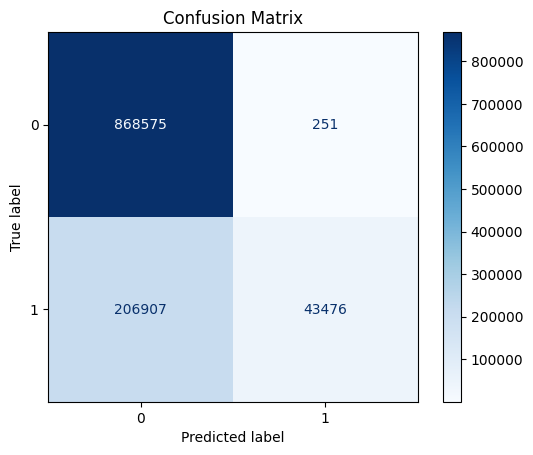

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay




# 평가 지표 출력
print("Classification Report:\n")
print(classification_report(y_val, y_pred))

# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
